Merge CSV Files

In [ ]:
import pandas as pd
import os

csv_path = "C:/Users/yicheng/Desktop/data/csv/"
csv_names = [
    "UNSW-NB15_1.csv",
    "UNSW-NB15_2.csv",
    "UNSW-NB15_3.csv",
    "UNSW-NB15_4.csv"
]
output_filename = "merged_raw_dataset.csv"
output_path = os.path.join(csv_path, output_filename)

# define the column names for the merged dataframe
column_names = [
    'srcip', 'sport', 'dstip', 'dport', 'proto', 'state', 'dur', 'sbytes', 'dbytes',
    'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts',
    'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
    'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sinpkt', 'dinpkt', 'tcprtt',
    'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
    'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'attack_cat', 'label'
]

# merge CSV files
def merge_csvs(folder, file_names, columns):
    df_all = []
    for fname in file_names:
        full_path = os.path.join(folder, fname)
        df = pd.read_csv(full_path, header=None)
        df_all.append(df)
    merged_df = pd.concat(df_all, ignore_index=True)
    merged_df.columns = columns
    merged_df.to_csv(output_path, index=False)
    print(f"Merge {len(file_names)} files, totally {len(merged_df)} data.")
    print(merged_df.head())

# define main function 
if __name__ == "__main__":
    merge_csvs(csv_path, csv_names, column_names)


C:\Users\yicheng\AppData\Local\Temp\ipykernel_24796\2979369973.py:31: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(full_path, header=None)
C:\Users\yicheng\AppData\Local\Temp\ipykernel_24796\2979369973.py:31: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(full_path, header=None)


Merge 4 files, totally 2540047 data.
        srcip  sport          dstip dport proto state       dur  sbytes  \
0  59.166.0.0   1390  149.171.126.6    53   udp   CON  0.001055     132   
1  59.166.0.0  33661  149.171.126.9  1024   udp   CON  0.036133     528   
2  59.166.0.6   1464  149.171.126.7    53   udp   CON  0.001119     146   
3  59.166.0.5   3593  149.171.126.5    53   udp   CON  0.001209     132   
4  59.166.0.3  49664  149.171.126.0    53   udp   CON  0.001169     146   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     164    31  ...           0           3           7          1   
1     304    31  ...           0           2           4          2   
2     178    31  ...           0          12           8          1   
3     164    31  ...           0           6           9          1   
4     178    31  ...           0           7           9          1   

   ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  attack_cat  \
0   

In [ ]:
import pandas as pd
import os

output_path = r"C:\Users\yicheng\Desktop\data\csv\merged_cleaned_dataset.csv"
df = pd.read_csv(output_path)

# output basic information
print("Data shape (rows, columns):", df.shape)

file_size_bytes = os.path.getsize(output_path)
print("File size: {:.2f} MB".format(file_size_bytes / (1024 * 1024)))

attack_counts = df['attack_cat'].value_counts()
print(attack_counts)

attack_percentages = df['attack_cat'].value_counts(normalize=True) * 100
print(attack_percentages)



Data shape (rows, columns): (2059418, 31)
File size: 282.51 MB
attack_cat
Normal            1959773
Exploits            27599
Generic             25378
Fuzzers             21795
Reconnaissance      13357
DoS                  5665
Analysis             2185
Backdoors            1984
Shellcode            1511
Worms                 171
Name: count, dtype: int64
attack_cat
Normal            95.161497
Exploits           1.340136
Generic            1.232290
Fuzzers            1.058309
Reconnaissance     0.648581
DoS                0.275078
Analysis           0.106098
Backdoors          0.096338
Shellcode          0.073370
Worms              0.008303
Name: proportion, dtype: float64


Descriptive Statistics for 30 Feature Values

In [ ]:
import pandas as pd
import os
# define categories for analysis
attack_categories = [
    'Normal', 'Fuzzers', 'Analysis', 'Backdoors', 'DoS', 
    'Exploits', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'
]

feature_categories = [
    'dur', 'sbytes', 'dbytes', 'spkts', 'dpkts', 'sload', 'dload', 'smeansz', 'dmeansz', 'sttl',
    'state', 'service', 'proto', 'tcprtt', 'synack', 'ackdat', 'ct_srv_src', 'ct_srv_dst', 
    'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'trans_depth', 'res_bdy_len', 'ct_flw_http_mthd', 'is_ftp_login', 'dttl', 'is_sm_ips_ports', 'stime'
]


def clean_data(csv_path):
    # read csv file and clean the data
    df = pd.read_csv(csv_path)
    # change the 'attack_cat' column to 'Normal' for rows where it is empty and label is 0
    df.loc[(df['attack_cat'].isna() | (df['attack_cat'] == '')) & (df['label'] == 0), 'attack_cat'] = 'Normal'
    # replace '-' in 'service' column with 'unknown'
    df['service'] = df['service'].replace('-', 'unknown')
    # fill Nan values
    for col in ['ct_flw_http_mthd', 'is_ftp_login']:
        if col in df.columns:
            df[col].fillna(0, inplace=True)
    # delete spaces
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    # change attack category
    df['attack_cat'] = df['attack_cat'].replace('Backdoor', 'Backdoors')
    # delete duplicate rows
    df.drop_duplicates(inplace=True)
    # Keep only the 29 features + attack_cat
    selected_columns = feature_categories + ['attack_cat']
    df = df[selected_columns]
    print(df.head())
    df.to_csv(r"C:\Users\yicheng\Desktop\data\csv\merged_cleaned_dataset.csv", index=False)
    return df
  
def generate_statistics_report(df, feature_categories, attack_categories, output_path):
    #define numeric and categorical columns
    numeric_cols = [
    'dur', 'sbytes', 'dbytes', 'spkts', 'dpkts',
    'sload', 'dload', 'smeansz', 'dmeansz', 'sttl',
    'tcprtt', 'synack', 'ackdat',
    'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'trans_depth', 'res_bdy_len', 'ct_flw_http_mthd',
    'dttl', 'is_ftp_login', 'is_sm_ips_ports']

    categorical_cols = ['state', 'service', 'proto']

    # count the number and percentage of each attack category
    class_counts = df['attack_cat'].value_counts()
    class_proportions = df['attack_cat'].value_counts(normalize=True).round(4)
    print(pd.DataFrame({'Counts': class_counts, 'Percentage': class_proportions}))

    # get data of different attack categories
    df_normal_all = df[df['attack_cat'] == 'Normal']
    for attack_type in attack_categories:
        if attack_type == 'Normal':
            continue  
        df_attack = df[df['attack_cat'] == attack_type]
       
        # randomly sample normal data based on the number of attack samples
        sample_size = len(df_attack)
        df_normal_sampled = df_normal_all.sample(n=sample_size, random_state=42)

        # select feature columns
        df_attack_selected = df_attack[feature_categories]
        df_normal_selected = df_normal_sampled[feature_categories]

        # select and analysis numeric columns
        numeric_cols = [col for col in numeric_cols if col in df_attack_selected.columns]
        numeric_stats_attack = df_attack_selected[numeric_cols].describe().T if numeric_cols else None
        numeric_stats_normal = df_normal_selected[numeric_cols].describe().T if numeric_cols else None

        # select and analysis categorical columns
        categorical_cols = [col for col in categorical_cols if col in df_attack_selected.columns]
        categorical_stats_attack = {
            col: df_attack_selected[col].value_counts().to_string()
            for col in categorical_cols
        }
        categorical_stats_normal = {
            col: df_normal_selected[col].value_counts().to_string()
            for col in categorical_cols
        }


        report_filename = f"Normal & {attack_type}.txt"
        report_filepath = os.path.join(output_path, report_filename)

        with open(report_filepath, 'w') as f:
            # write normal statistics
            f.write("Normal Statistics\n")
            f.write("Numeric Features:\n")
            f.write(numeric_stats_normal.to_string())
            f.write("\n\nCategorical Features:")
            for col, counts in categorical_stats_normal.items():
                f.write(f"\n\n{col}:\n")
                f.write(counts)

            # write attack statistics
            f.write("\n\n\n " + attack_type + " Statistics\n")
            f.write("Numeric Features:\n")
            f.write(numeric_stats_attack.to_string())
            f.write("\n\nCategorical Features:")
            for col, counts in categorical_stats_attack.items():
                f.write(f"\n\n{col}:\n")
                f.write(counts)
  

if __name__ == '__main__':
    csv_file_path = r"C:\Users\yicheng\Desktop\data\csv\merged_raw_dataset.csv"
    output_path = r"C:\Users\yicheng\Desktop\data\statistics"
    
    cleaned_df = clean_data(csv_file_path)
    generate_statistics_report(cleaned_df, feature_categories,attack_categories, output_path)

C:\Users\yicheng\AppData\Local\Temp\ipykernel_32192\1927344497.py:34: DtypeWarning: Columns (1,3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
C:\Users\yicheng\AppData\Local\Temp\ipykernel_32192\1927344497.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)
C:\Users\yicheng\AppData\Local\Temp\ipykernel_32192\1927344497.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda

        dur  sbytes  dbytes  spkts  dpkts         sload         dload  \
0  0.001055     132     164      2      2  500473.93750  621800.93750   
1  0.036133     528     304      4      4   87676.08594   50480.17188   
2  0.001119     146     178      2      2  521894.53130  636282.37500   
3  0.001209     132     164      2      2  436724.56250  542597.18750   
4  0.001169     146     178      2      2  499572.25000  609067.56250   

   smeansz  dmeansz  sttl  ... ct_dst_sport_ltm ct_dst_src_ltm trans_depth  \
0       66       82    31  ...                1              1           0   
1      132       76    31  ...                1              2           0   
2       73       89    31  ...                1              1           0   
3       66       82    31  ...                1              1           0   
4       73       89    31  ...                1              1           0   

   res_bdy_len  ct_flw_http_mthd  is_ftp_login  dttl  is_sm_ips_ports  \
0            0     

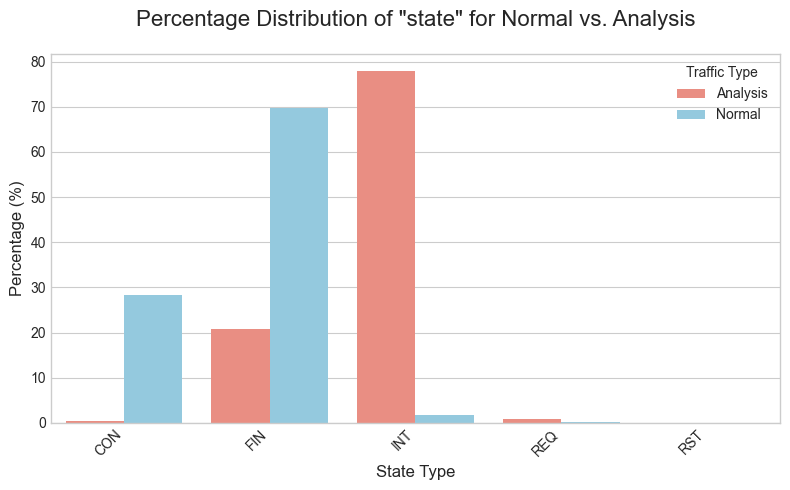

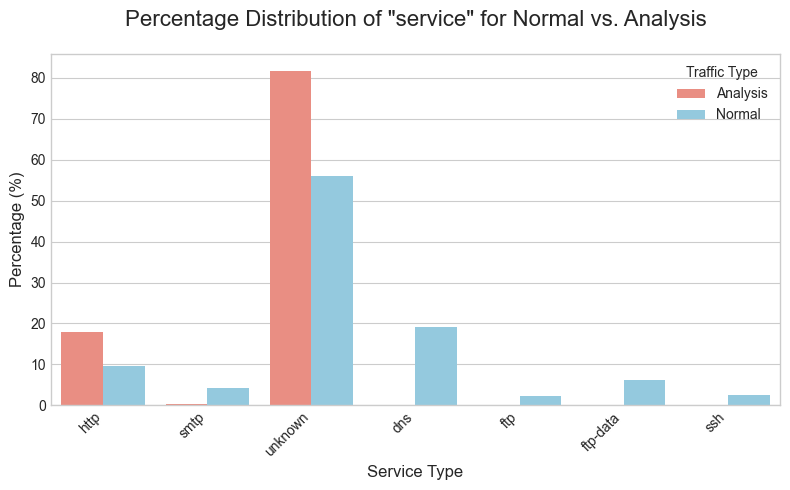

C:\Users\yicheng\AppData\Local\Temp\ipykernel_32192\2458285497.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=combined_df, x='Type', y=feature, palette={'Normal': 'skyblue', attack_name: 'salmon'})


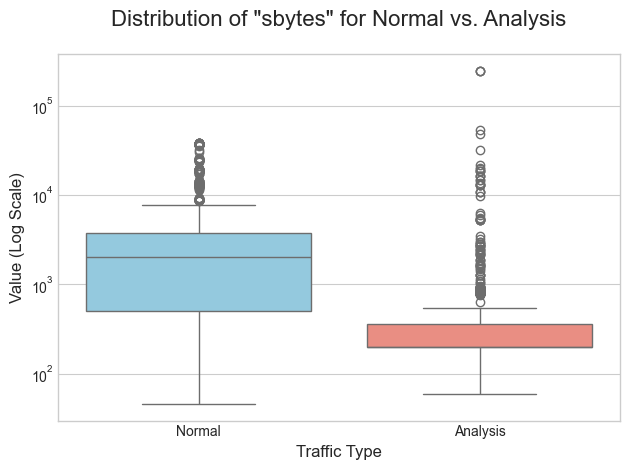

C:\Users\yicheng\AppData\Local\Temp\ipykernel_32192\2458285497.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=combined_df, x='Type', y=feature, palette={'Normal': 'skyblue', attack_name: 'salmon'})


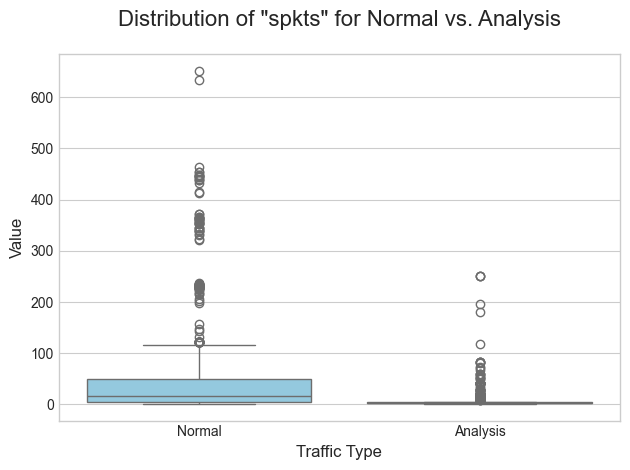

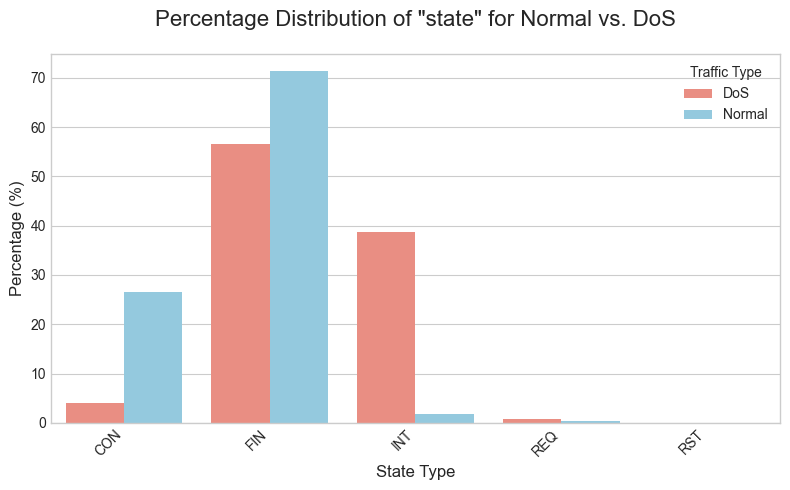

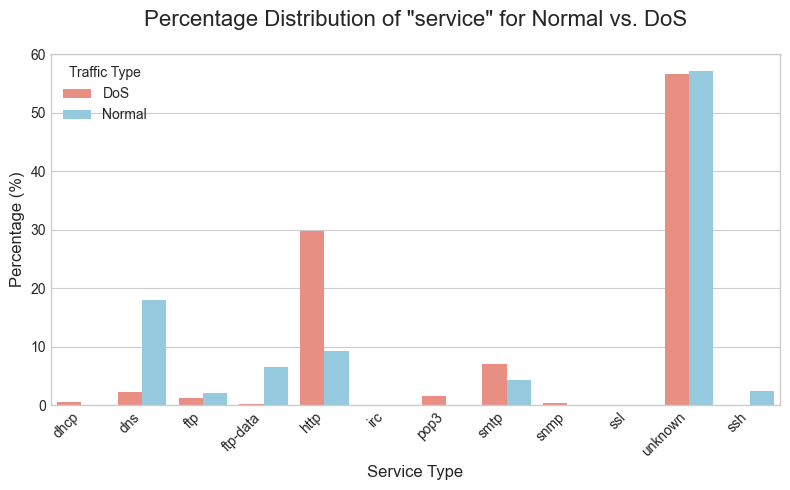

C:\Users\yicheng\AppData\Local\Temp\ipykernel_32192\2458285497.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=combined_df, x='Type', y=feature, palette={'Normal': 'skyblue', attack_name: 'salmon'})


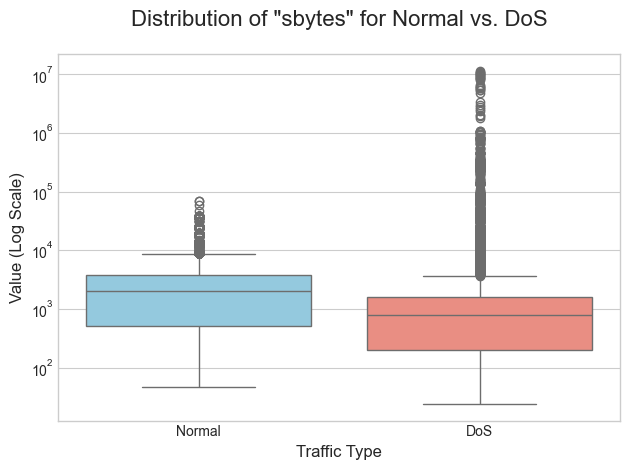

C:\Users\yicheng\AppData\Local\Temp\ipykernel_32192\2458285497.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=combined_df, x='Type', y=feature, palette={'Normal': 'skyblue', attack_name: 'salmon'})


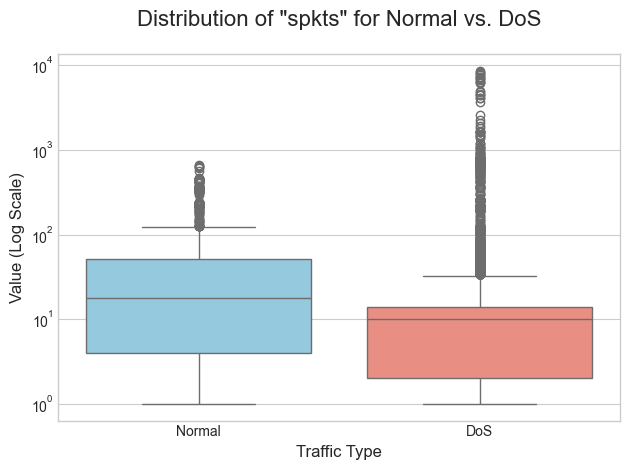

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def categorical_comparison(df_normal, df_attack, feature, attack_name, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    
    # merge data
    df_normal['Type'] = 'Normal'
    df_attack['Type'] = attack_name
    combined_df = pd.concat([df_normal, df_attack], ignore_index=True)

    # calculate proportions
    proportion_df = combined_df.groupby(['Type', feature], as_index=False).size()
    proportion_df['Percentage'] = proportion_df.groupby('Type')['size'].transform(lambda x: 100 * x / x.sum())

    # plotting
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=proportion_df,
        x=feature,
        y='Percentage',
        hue='Type',
        palette={'Normal': 'skyblue', attack_name: 'salmon'}
    )
    
    plt.title(f'Percentage Distribution of "{feature}" for Normal vs. {attack_name}', fontsize=16, pad=20)
    plt.xlabel(f'{feature.capitalize()} Type', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(title='Traffic Type')
    save_path = os.path.join(output_dir, f'{attack_name}_vs_Normal_{feature}.png')
    plt.savefig(save_path)
    plt.show()


def numeric_comparison(df_normal, df_attack, feature, attack_name, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    # merge data
    df_normal['Type'] = 'Normal'
    df_attack['Type'] = attack_name
    combined_df = pd.concat([df_normal, df_attack], ignore_index=True)

    ax = sns.boxplot(data=combined_df, x='Type', y=feature, palette={'Normal': 'skyblue', attack_name: 'salmon'})
    ax.set_title(f'Distribution of "{feature}" for Normal vs. {attack_name}', fontsize=16, pad=20)
    ax.set_xlabel('Traffic Type', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    
    is_large_range = combined_df[feature].max() > 1000 and combined_df[feature].min() >= 0
    if is_large_range:
        ax.set_yscale('log')
        ax.set_ylabel('Value (Log Scale)', fontsize=12)

    plt.tight_layout()
    save_path = os.path.join(output_dir, f'{attack_name}_vs_Normal_{feature}.png')
    plt.savefig(save_path)
    plt.show()

def analyze_and_visualize_attacks(df, attack_types_to_analyze, output_dir):
    categorical_cols = ['state', 'service']
    numeric_features = ['sbytes', 'spkts']
    df_normal_all = df[df['attack_cat'] == 'Normal']

    for attack_type in attack_types_to_analyze:
        df_attack = df[df['attack_cat'] == attack_type]
        
        # sample normal data based on the number of attack samples
        sample_size = len(df_attack)
        df_normal_sampled = df_normal_all.sample(n=sample_size, random_state=42)

        # select categorical features
        for cat_feature in categorical_cols:
            categorical_comparison(
                df_normal_sampled.copy(), 
                df_attack.copy(), 
                feature=cat_feature, 
                attack_name=attack_type,
                output_dir=output_dir
            )

        # 2. select numeric features
        for num_feature in numeric_features:
            numeric_comparison(
                df_normal_sampled.copy(), 
                df_attack.copy(), 
                feature=num_feature, 
                attack_name=attack_type,
                output_dir=output_dir
            )


cleaned_df = pd.read_csv(r"C:\Users\yicheng\Desktop\data\csv\merged_cleaned_dataset.csv")
output_path = r"C:\Users\yicheng\Desktop\data\visualizations"

# select categories to plot
attack_cat = ['Analysis', 'DoS']
analyze_and_visualize_attacks(cleaned_df, attack_cat, output_path)